准确率: 0.9488919041157847
混淆矩阵:
 [[ 904   76]
 [  37 1194]]
分类报告:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       980
           1       0.94      0.97      0.95      1231

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



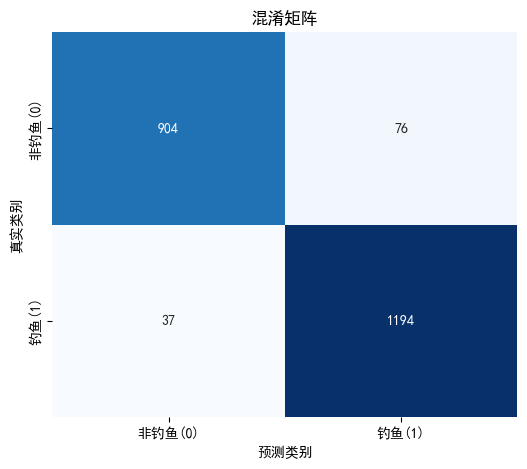

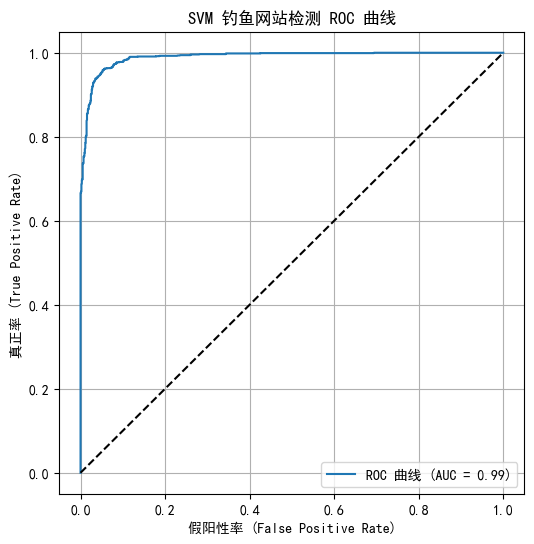

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv('Phishing_Websites_Data.csv')

# 分割特征和标签
X = data.drop(columns=['Result'])  
y = data['Result']

# 处理标签，将-1变为0，符合sklearn二分类习惯
y = y.replace(-1, 0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 创建SVM分类器，默认核为RBF，也可调参
clf = SVC(kernel='rbf', probability=True, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  

# 评估模型
print("准确率:", accuracy_score(y_test, y_pred))
print("混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

# 绘制混淆矩阵图
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['非钓鱼(0)', '钓鱼(1)'],
            yticklabels=['非钓鱼(0)', '钓鱼(1)'])
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('混淆矩阵')
plt.show()

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC 曲线 (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('假阳性率 (False Positive Rate)')
plt.ylabel('真正率 (True Positive Rate)')
plt.title('SVM 钓鱼网站检测 ROC 曲线')
plt.legend(loc='lower right')
plt.grid()
plt.show()


标签分布：
Result
1    6157
0    4898
Name: count, dtype: int64


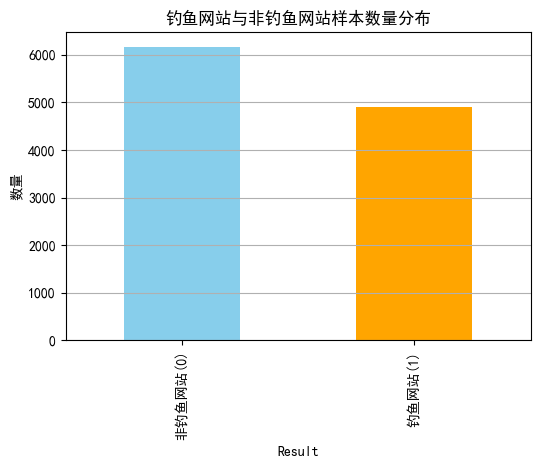

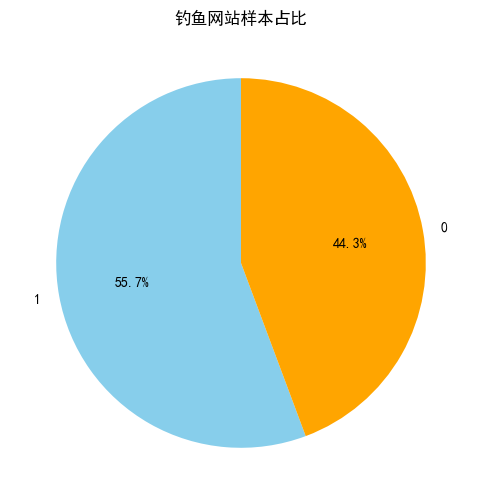

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('Phishing_Websites_Data.csv')

# 替换标签便于统计
data['Result'] = data['Result'].replace({-1: 0})

# 描述性统计：类别分布
label_counts = data['Result'].value_counts()
print("标签分布：")
print(label_counts)

# 条形图：展示钓鱼网站与非钓鱼网站数量
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks(ticks=[0,1], labels=['非钓鱼网站(0)', '钓鱼网站(1)'])
plt.ylabel('数量')
plt.title('钓鱼网站与非钓鱼网站样本数量分布')
plt.grid(axis='y')
plt.show()




变量 having_IP_Address 的取值计数：
having_IP_Address
 1    7262
-1    3793
Name: count, dtype: int64

变量 URL_Length 的取值计数：
URL_Length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64

变量 Shortining_Service 的取值计数：
Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64

变量 SSLfinal_State 的取值计数：
SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64

变量 web_traffic 的取值计数：
web_traffic
 1    5831
-1    2655
 0    2569
Name: count, dtype: int64

按类别分组计算变量均值：
        having_IP_Address  URL_Length  Shortining_Service  SSLfinal_State  \
Result                                                                      
0                0.213557   -0.682523            0.790118       -0.479788   
1                0.393536   -0.593958            0.697905        0.832223   

        web_traffic  
Result               
0         -0.033891  
1          0.542797  


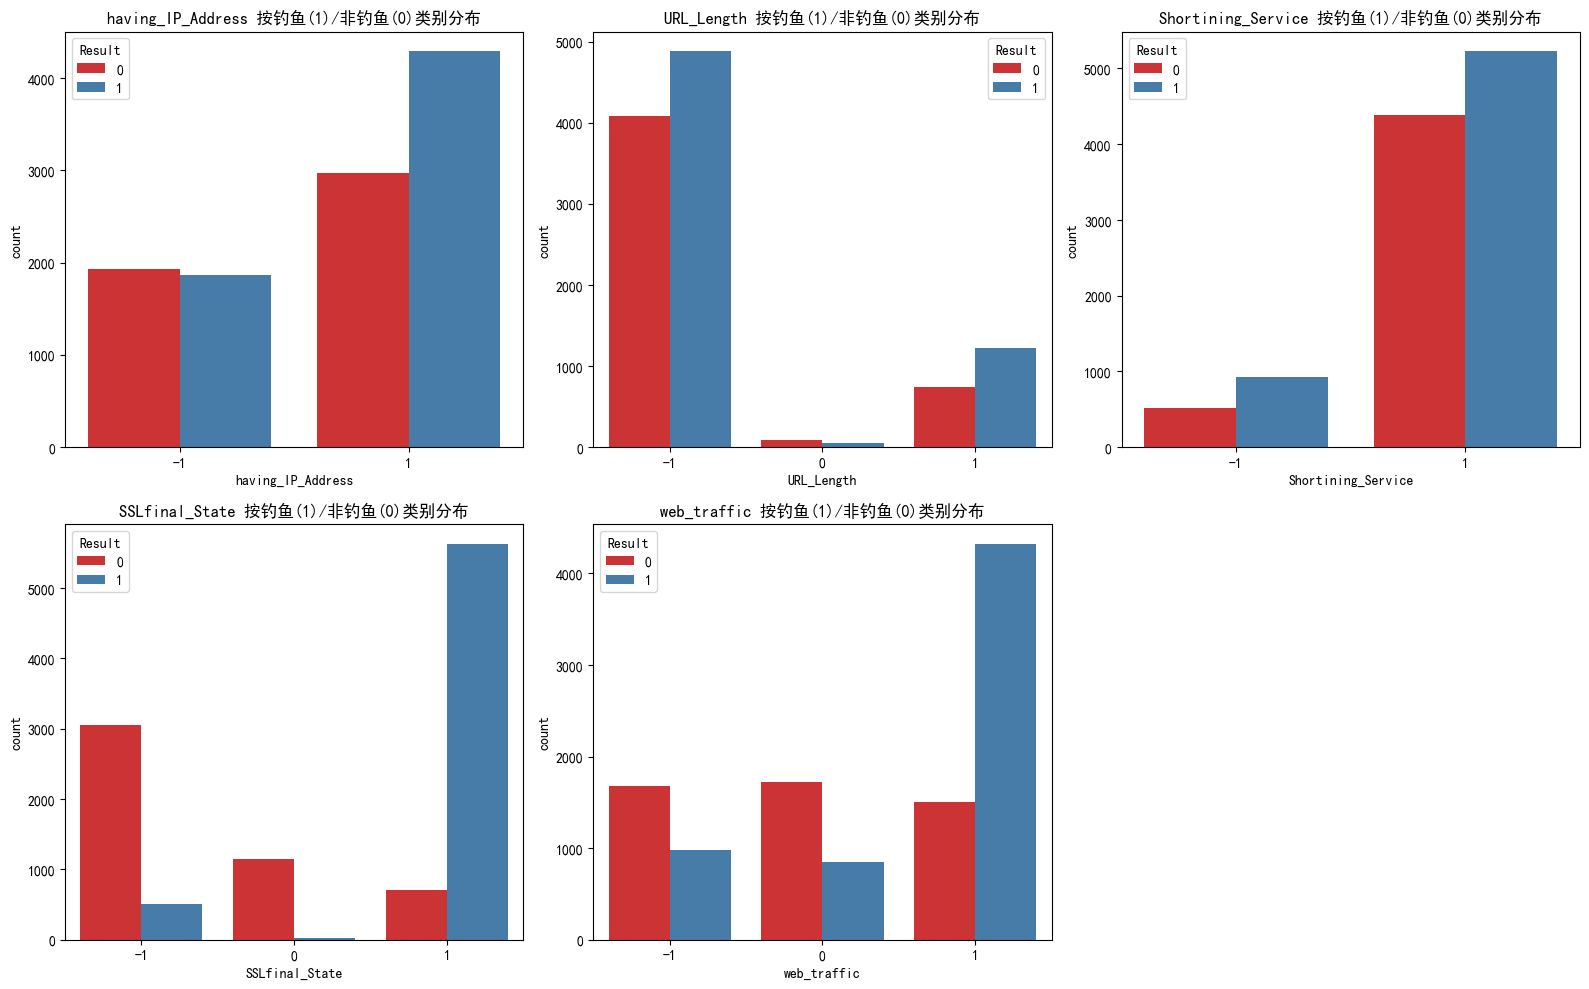

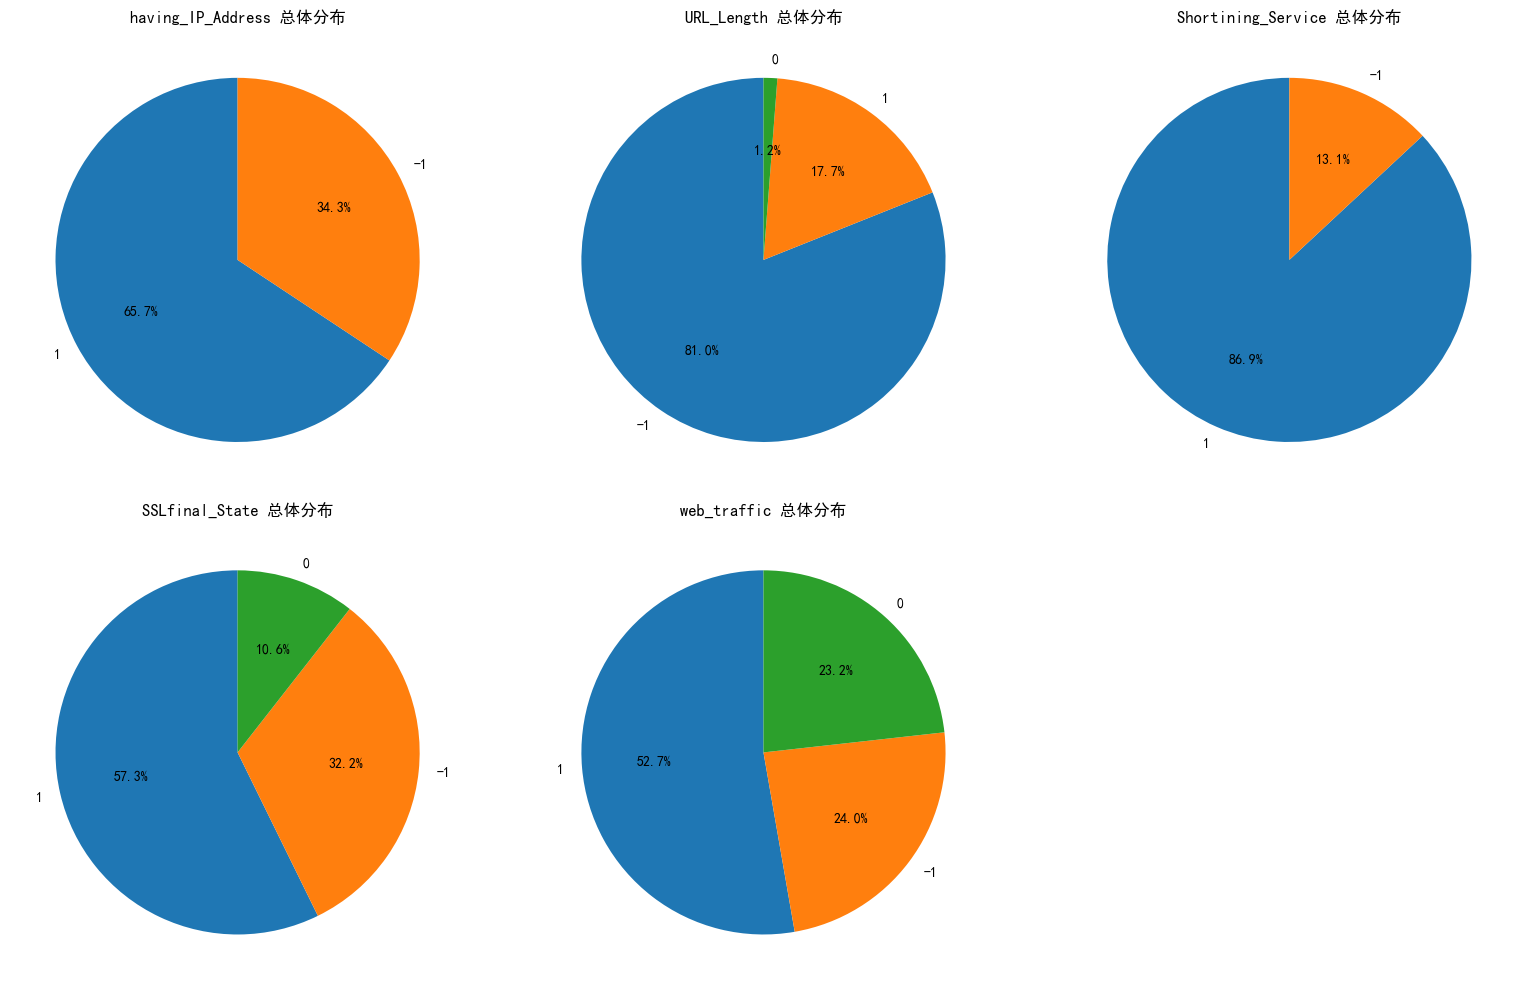

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('Phishing_Websites_Data.csv')

# 标签处理，-1替换为0
data['Result'] = data['Result'].replace(-1, 0)

# 选择分析的变量
variables = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service',
    'SSLfinal_State', 'web_traffic', 'Result'
]

# 变量取值分布打印
for var in variables[:-1]:  
    print(f"变量 {var} 的取值计数：")
    print(data[var].value_counts())
    print()

# 按类别计算各变量的均值
print("按类别分组计算变量均值：")
print(data.groupby('Result')[variables[:-1]].mean())

# 条形图：各变量按类别的分布对比
plt.figure(figsize=(16, 10))
for i, var in enumerate(variables[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=var, hue='Result', data=data, palette='Set1')
    plt.title(f'{var} 按钓鱼(1)/非钓鱼(0)类别分布')
plt.tight_layout()
plt.show()

# 扇形图：展示每个变量的整体取值比例
plt.figure(figsize=(16, 10))
for i, var in enumerate(variables[:-1]):
    plt.subplot(2, 3, i + 1)
    counts = data[var].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{var} 总体分布')
plt.tight_layout()
plt.show()


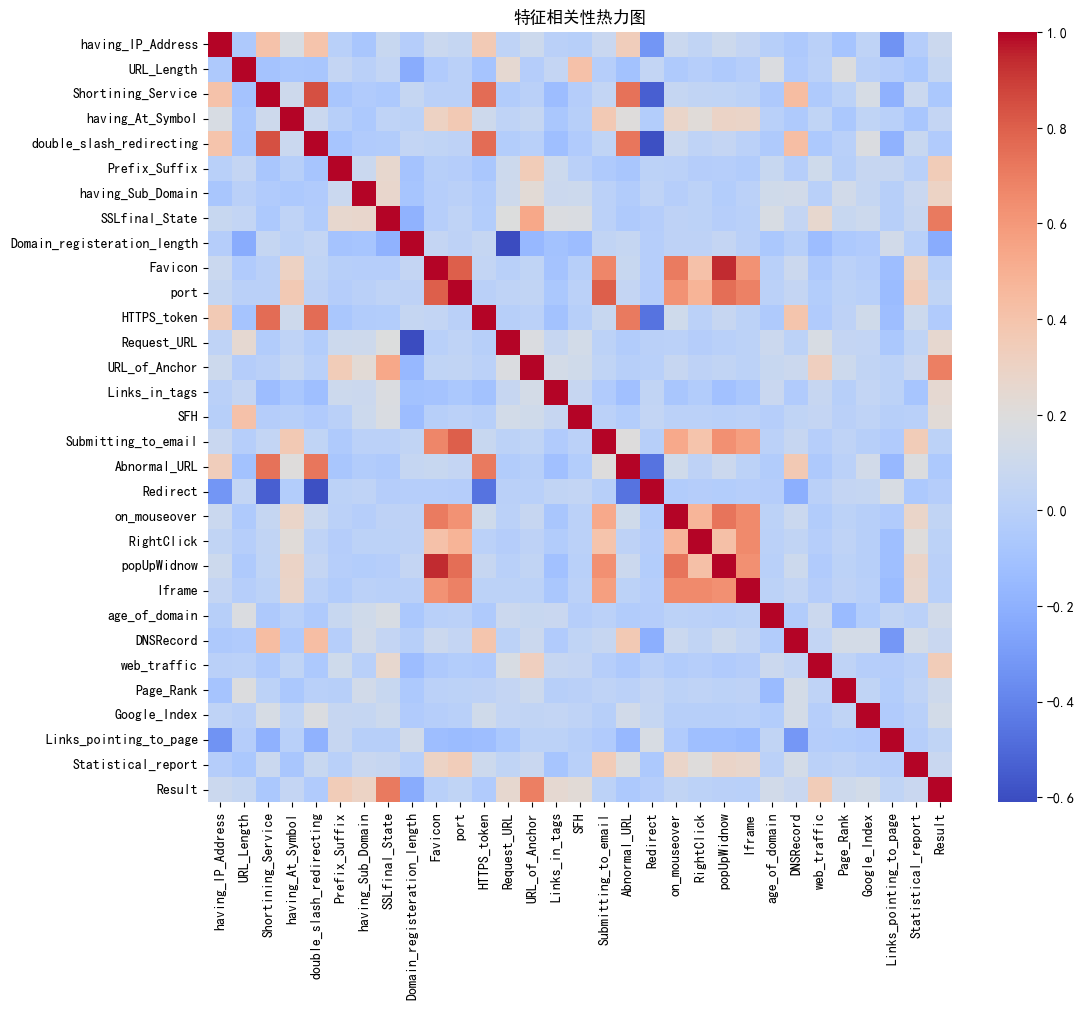

In [10]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("特征相关性热力图")
plt.show()
